# Problem 2: Two-Body Gravitational Problem

### Physics 5700 Final, Spring 2021
### Alex Bumgarner.187

## Part 1: Python Setup

Here, I import the packages needed for the rest of the notebook:

In [1]:
%matplotlib inline

import numpy as np #For our more complicated math

import matplotlib.pyplot as plt #For plotting

from IPython.display import Image #Allows us to display images from the web

from scipy.integrate import solve_ivp #Allows us to solve systems of ODE's

## Part 2: Problem Setup

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/f/f2/Orbit2.gif')

**Fig. 1: Two-Body Orbit**

*Source: Wikimedia Commons*

We are considering the motion of two masses, $m_1$ and $m_2$, attracted to each other by gravity. These masses are subject to no other forces, and we approximate them as point masses. Our goal is to solve for the motion of these objects.

We start by defining vectors for the position of each mass:

$$\vec r_1(t) = x_1(t) \hat x + y_1(t) \hat y $$

$$\vec r_2(t) = x_2(t) \hat x + y_2(t) \hat y $$

Thus, the distance between our two objects is given by:

$$ \vec r(t) = \vec r_1 - \vec r_2 $$

$$ r = |\vec r(t)| = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$

The force on each mass is given by:

$$ \vec F = \pm \frac{G m_1 m_2}{r^2} \hat r$$

To solve this, we need Newton's Second Law in component (x,y) form. Let's start by analyzing $m_1$:

$$ \vec F = \frac{G m_1 m_2}{r^2} \hat r = m_1 \ddot{ \vec{ r_1 }}$$

Breaking this into its component form (and using a bit of trig), we get:

$$ \ddot x_1 = \frac{G m_2 (x_2 - x_1)}{r^3} $$

$$ \ddot y_1 = \frac{G m_2 (y_2 - y_1)}{r^3} $$

For $m_2$, the sign is just reversed:

$$ \ddot x_2 = -\frac{G m_2 (x_2 - x_1)}{r^3} $$

$$ \ddot y_2 = -\frac{G m_2 (y_2 - y_1)}{r^3} $$

We now have a system of second-order ordinary differential equations.

## Part 3: Solving for the Motion

*The following is largely adapted from Problem 1*

In [3]:
class Orbit():
    """
    This class creates a two-body orbital system and solves for the motion using Newtonian mechanics
    
    Parameters
    ------------
    m1: float
        mass of first object
    m2: float
        mass of second object
    G:  float
        gravitational constant
    """
    
    def __init__(self, m1 = 1., m2 = 1. , G = 1.):
        """
        Initializes the orbit and provides default values if none are provided by user
        """
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
        
    def dz_dt(self,t,z): #Renamed dz_dt so as not to be confused with the y-direction
        """
        Inputs an eight-component vector z (each x,y,xdot,ydot) and outputs the time derivative
        z[0] = x1
        z[1] = x1dot
        z[2] = y1
        z[3] = y1dot
        z[4] = x2
        z[5] = x2dot
        z[6] = y2
        z[7] = y2dot 
        """
        
        r_dist = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2) #The distance between the objects, defined for simplicity
        
        #The time derivative vector to return:
        time_deriv = [z[1], self.G*self.m2*(z[4]-z[0])/r_dist**3, \
                      z[3], self.G*self.m2*(z[6]-z[2])/r_dist**3, \
                      z[5], -self.G*self.m1*(z[4]-z[0])/r_dist**3, \
                      z[7], -self.G*self.m1*(z[6]-z[2])/r_dist**3]   
       
        
        return(time_deriv)
    

    def solve_ode(self, t_pts, z_0, abserr=1.0e-8,relerr = 1.0e-8):
        """
        Solves the system of 2nd order ODE's for gravitational motion in Cartesian coordinates over the specified time interval, t_pts
        Note: unlike in the previous problem, the initial conditions are entered as an eight-component vector rather than individual parameters to save space
        """
        
        z = z_0
        
        #Below, we use the solve_ivp function to solve for the motion over our set of t_pts
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), z, t_eval=t_pts, method = 'RK23', atol = abserr, rtol = relerr)
        x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = solution.y
        
        return(x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot)
    
    def dz_dt_classic(self,t,z):
        """
        Same as dz_dt, except this fixes m2 at the origin.
        In this way, mimics a central force problem where the force is unmoving.
        Used for comparing two-body motion to motion about a central unmoving force.
        """
        z[4] = 0
        z[5] = 0
        z[6] = 0
        z[7] = 0
        r_dist = np.sqrt((z[0]-z[4])**2 + (z[2]-z[6])**2) #The distance between the objects, defined for simplicity
        
        #The time derivative vector to return:
        time_deriv = [z[1], self.G*self.m2*(z[4]-z[0])/r_dist**3, \
                      z[3], self.G*self.m2*(z[6]-z[2])/r_dist**3, \
                      z[5], -self.G*self.m1*(z[4]-z[0])/r_dist**3, \
                      z[7], -self.G*self.m1*(z[6]-z[2])/r_dist**3]   
       
        
        return(time_deriv)
    
    def solve_ode_classic(self, t_pts, z_0, abserr=1.0e-8,relerr = 1.0e-8):
        """
        Same as solve_ode, except uses dz_dt_classic
        """
        z = z_0
        z[4] = 0
        z[5] = 0
        z[6] = 0
        z[7] = 0

        #Below, we use the solve_ivp function to solve for the motion over our set of t_pts
        solution = solve_ivp(self.dz_dt_classic, (t_pts[0], t_pts[-1]), z, t_eval=t_pts, method = 'RK23', atol = abserr, rtol = relerr)
        x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = solution.y

        return(x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot)

Now, a few plotting functions:

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Simple plot of points y vs. points x, found in Lagrangian_pendulum.ipynb
    """
    if ax is None:      
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle) #Plots on a normal scale unless otherwise specified

    if label is not None:   
        ax.legend()
    if title is not None:    
        ax.set_title(title)
    if axis_labels is not None:  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  
    return start_index, stop_index

Some labels:

In [6]:
y_vs_x_labels = (r'$x$', r'$y$')

## Part 4: Plotting the Motion

Here, we'll make some plots of the motion of the objects for various parameters and intial conditions.

In [7]:
# Define plotting time
t_start = 0.
t_end = 20.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#### Oribit 1: $m_2 = 5 m_1$

In [8]:
#Parameters
m1 = 1.0
m2 = 5.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -1
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o1 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o1.solve_ode(t_pts,z0)

(<matplotlib.axes._subplots.AxesSubplot at 0x1dea7f5f760>,
 <matplotlib.lines.Line2D at 0x1dea99d88e0>)

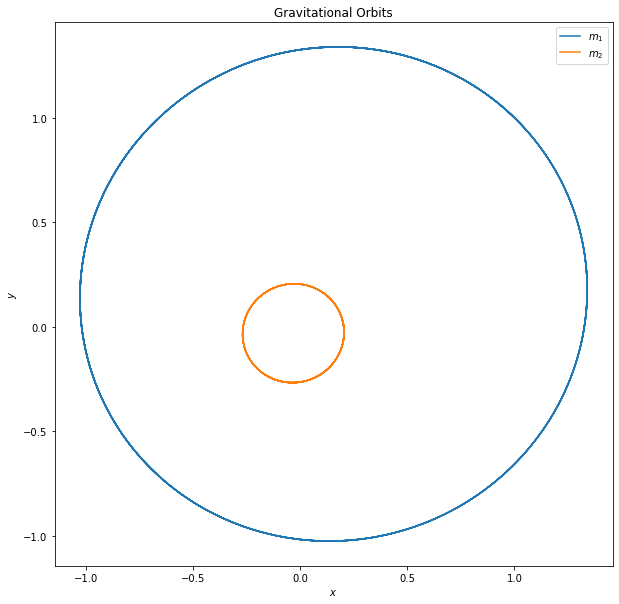

In [9]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 1 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Gravitational Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)


#### Oribit 2: $m_2 = 10 m_1$

In [12]:
#Parameters
m1 = 1.0
m2 = 10.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -1
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o2 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o2.solve_ode(t_pts,z0)

(<matplotlib.axes._subplots.AxesSubplot at 0x1dea81db910>,
 <matplotlib.lines.Line2D at 0x1dea8246a30>)

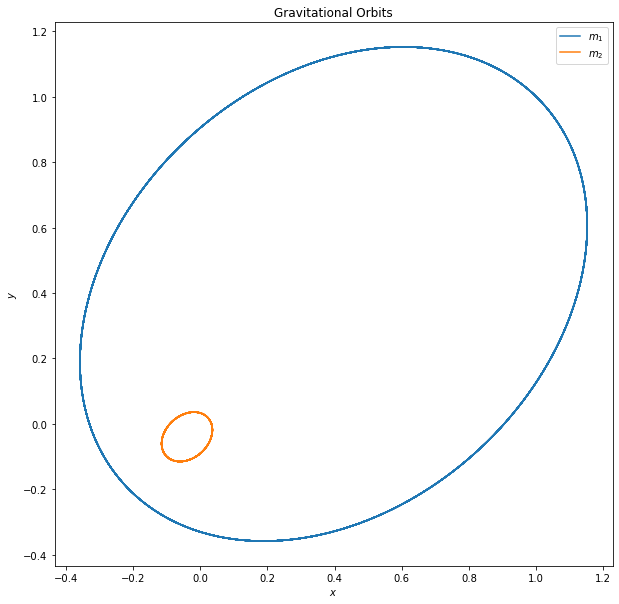

In [13]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 1 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Gravitational Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)


#### Oribit 3: $m_2 = 100 m_1$

In [14]:
#Parameters
m1 = 1.0
m2 = 100.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -1
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o3 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o3.solve_ode(t_pts,z0)

(<matplotlib.axes._subplots.AxesSubplot at 0x1dea82a49a0>,
 <matplotlib.lines.Line2D at 0x1dea899f730>)

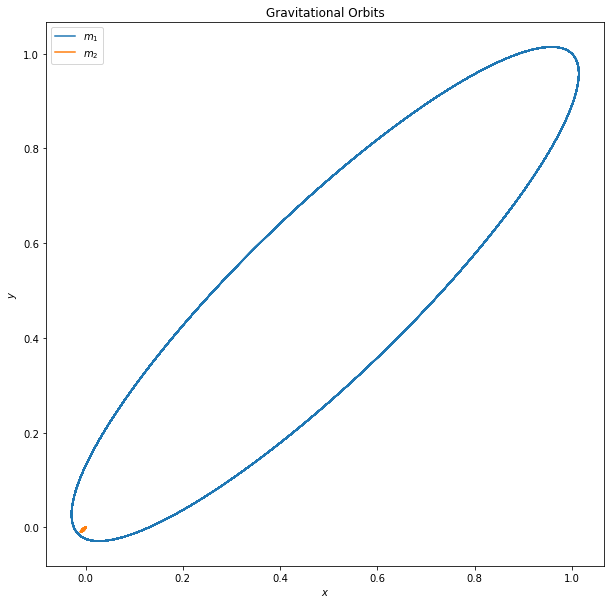

In [15]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 1 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Gravitational Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)

As expected, the larger $m_2$, the less $m_2$ moves. Although I don't have the computing power to make $m_2$ much larger, we would expect it to act like a stationary point as its mass became infinitely big. The orbit of $m_1$ also becomes less circlar, forming a more extreme ellipse.

#### Oribit 3: $m_2 = 100 m_1$, $\dot x_1 = -10$

In [16]:
#Parameters
m1 = 1.0
m2 = 100.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -10
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o4 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o4.solve_ode(t_pts,z0)

(<matplotlib.axes._subplots.AxesSubplot at 0x1deab004790>,
 <matplotlib.lines.Line2D at 0x1deab051c10>)

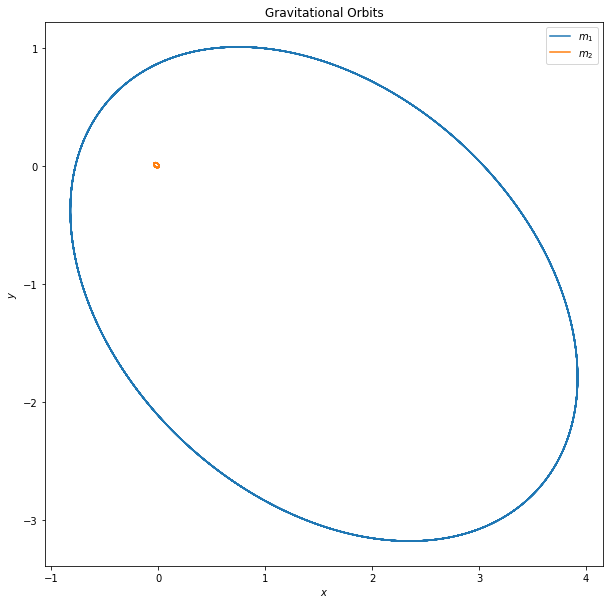

In [17]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 1 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Gravitational Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)

Here, the faster velocity results in an orbit that does not cross as close to $m_2$, though still closes.

#### Oribit 4: $m_2 = 100 m_1$, $\dot x_1 = -20$

In [18]:
#Parameters
m1 = 1.0
m2 = 100.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -20
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o5 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o5.solve_ode(t_pts,z0)

(<matplotlib.axes._subplots.AxesSubplot at 0x1deab0ad8b0>,
 <matplotlib.lines.Line2D at 0x1dea81dbfd0>)

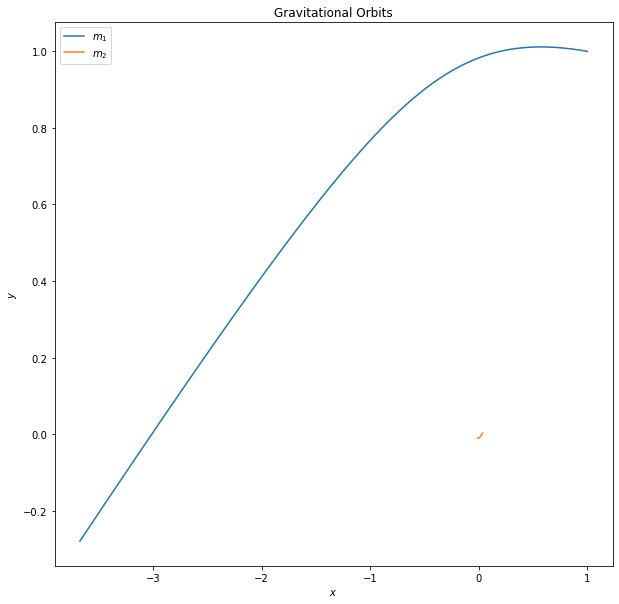

In [19]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 1 set of plots

start,stop = start_stop_indices(t_pts,t_start,.25)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Gravitational Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)

Here, the increased speed gives $m_1$ so much energy that it is unbounded, traveling into space instead of forming an orbit.

## Part 5: Comparing the Motion

Here, we compare the motion of a two-body system with $m_2 >> m_1$ to a simplified system where $m_2$ is fixed at the origin (0,0).

We start by creating a two-body orbit (identitcal to Orbit 3 above):

In [20]:
#Parameters
m1 = 1.0
m2 = 100.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -10
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o6 = Orbit(m1,m2,G)

#Solve for the motion
x1,x1dot,y1,y1dot,x2,x2dot,y2,y2dot = o6.solve_ode(t_pts,z0)

Now, an orbit where the second mass is fixed at (0,0):

In [21]:
#Parameters
m1 = 1.0
m2 = 100.0
G = 1.0

#Initial conditions:
x1_0 = 1
x1dot_0 = -10
y1_0 = 1
y1dot_0 = 1
x2_0 = -(m1/m2)*x1_0 #We must ensure that the center of mass is motionless
x2dot_0 = -(m1/m2)*x1dot_0
y2_0 = -(m1/m2)*y1_0
y2dot_0 = -(m1/m2)*y1dot_0

#Make a vector out of our initial conditions to plug into the diff. eq. solver
z0 = [x1_0, x1dot_0, y1_0, y1dot_0, x2_0, x2dot_0, y2_0, y2dot_0]

#Create the orbit
o7 = Orbit(m1,m2,G)

#Solve for the motion using solve_ode_classic, which fixes m2 at the origin 
x1_cl,x1dot_cl,y1_cl,y1dot_cl,x2_cl,x2dot_cl,y2_cl,y2dot_cl = o7.solve_ode_classic(t_pts,z0)

Now, we'll plot the motion of the two orbits:

(<matplotlib.axes._subplots.AxesSubplot at 0x1deab0ea910>,
 <matplotlib.lines.Line2D at 0x1deaedcd670>)

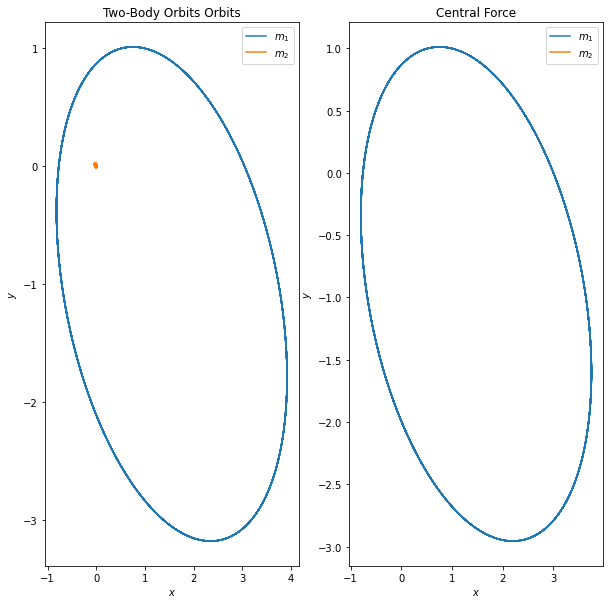

In [22]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,2,1) #1 by 2 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Two-Body Orbits Orbits",
            ax = ax_a)
plot_y_vs_x(x2[start:stop],y2[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_a)

ax_b = fig.add_subplot(1,2,2)
start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1_cl[start:stop],y1_cl[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$',
            title = "Central Force",
            ax = ax_b)
plot_y_vs_x(x2_cl[start:stop],y2_cl[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_2$',
            ax = ax_b)

As expected, these two plots look very similar. When one mass is >> than the other mass, it behaves like an unmoving central force. For clarity, we'll plot the two trajectories of $m_1$ below:

(<matplotlib.axes._subplots.AxesSubplot at 0x1dea82df0d0>,
 <matplotlib.lines.Line2D at 0x1dead23ccd0>)

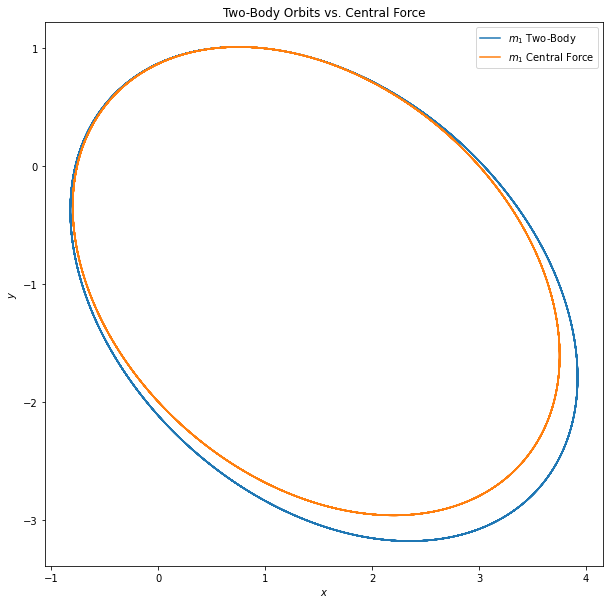

In [23]:
fig = plt.figure(figsize = (10,10))


ax_a = fig.add_subplot(1,1,1) #1 by 2 set of plots

start,stop = start_stop_indices(t_pts,t_start,t_end)
plot_y_vs_x(x1[start:stop],y1[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$ Two-Body',
            title = "Two-Body Orbits vs. Central Force",
            ax = ax_a)
plot_y_vs_x(x1_cl[start:stop],y1_cl[start:stop],
            axis_labels = y_vs_x_labels,
            label = r'$m_1$ Central Force',
            ax = ax_a)

As expected, these two orbits are very similar. Although there is some difference when farthest from $m_2$, this would presumably be minimized as $m_2$ goes to infinity in the two-body version.